In [ ]:
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from keras import backend as K
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [ ]:
class binaryaddition:
  def __init__(self):
    pass

  def file_input(self):
    data = pd.read_csv("/content/drive/My Drive/Neural Nets Assignment/adder_data.csv")
    return data
  
  def data_preprocessing(self,dataset):
    dataset = dataset.values
    X = dataset[:,0:8]
    y = dataset[:,8:13]

    #splitting of data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)
    return X_train, X_test, y_train, y_test

  #zero hidden layers 
  def NN_arch1(self,lrate=0.001):
    #one input one output #zero hidden layers
    model = models.Sequential()
    model.add(layers.Dense(8,input_dim = 8, activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

  #1 hidden layer with a sigmoid activation
  def NN_arch2(self,lrate=0.001):
    #1 hidden layer with a sigmoid activation
    model = models.Sequential()
    model.add(layers.Dense(8,input_dim = 8, activation='sigmoid'))
    model.add(layers.Dense(8, activation='sigmoid'))
    model.add(layers.Dense(5, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

  #1 hidden layer with a relu activation
  def NN_arch3(self,lrate=0.001):
    #1 hidden layer with a relu activation
    model = models.Sequential()
    model.add(layers.Dense(8,input_dim = 8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model
  
  #2 hidden layer with a relu activation
  def NN_arch4(self,lrate=0.001):
    #2 hidden layer with a relu activation
    model = models.Sequential()
    model.add(layers.Dense(8,input_dim = 8, activation='relu'))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(lr=lrate)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    return model

  
  def model_fit(self,model,epoch_val=50):
    callbacks = EarlyStopping(monitor='val_loss',mode='min',patience=3)
    model.fit(X_train, y_train, epochs=epoch_val,batch_size=32)
    val_loss, val_acc = model.evaluate(X_test,y_test)
    print(val_loss, val_acc)
    return val_loss,val_acc

  def predicted(self,prediction):
    for i in prediction:
      print("")
      for j in i:
        if j > 0.5:
          print(1," ",end="")
        else:
          print(0," ",end="")

  def history_plot(self,history):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    training_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.figure(figsize=(5,3))

    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    #Visualize accuracy history
    plt.plot(epoch_count, training_acc, 'r--')
    plt.plot(epoch_count, test_acc, 'b-')
    plt.legend(['Training acc', 'Test acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.show();

In [ ]:
learner = binaryaddition()

In [ ]:
data = learner.file_input()

In [ ]:
X_train, X_test, y_train, y_test = learner.data_preprocessing(data)

Model Execution for a zero hidden layer<br>
Epoch - 200
<br>
Learning Rate = 0.001<br>
Input Layer Sigmoid Input<br>
No Hidden Layer<br>
Output Layer Sigmoid Output


Epoch 1/200
192/192 [==============================] - 0s 257us/step - loss: 0.7959 - accuracy: 0.4969
Epoch 2/200
192/192 [==============================] - 0s 44us/step - loss: 0.7948 - accuracy: 0.4979
Epoch 3/200
192/192 [==============================] - 0s 46us/step - loss: 0.7936 - accuracy: 0.4979
Epoch 4/200
192/192 [==============================] - 0s 59us/step - loss: 0.7926 - accuracy: 0.4979
Epoch 5/200
192/192 [==============================] - 0s 52us/step - loss: 0.7914 - accuracy: 0.4990
Epoch 6/200
192/192 [==============================] - 0s 47us/step - loss: 0.7904 - accuracy: 0.4990
Epoch 7/200
192/192 [==============================] - 0s 45us/step - loss: 0.7893 - accuracy: 0.4990
Epoch 8/200
192/192 [==============================] - 0s 48us/step - loss: 0.7883 - accuracy: 0.4990
Epoch 9/200
192/192 [==============================] - 0s 47us/step - loss: 0.7872 - accuracy: 0.4979
Epoch 10/200
192/192 [==============================] - 0s 49us/step - loss: 0.78

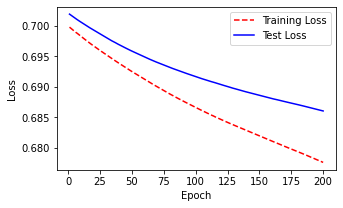

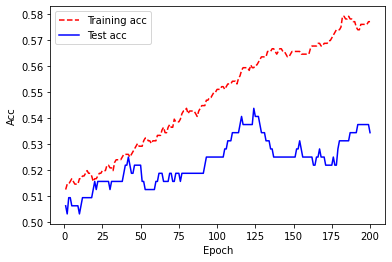

In [ ]:
model = learner.NN_arch1()
#print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
val_loss,val_acc = learner.model_fit(model,200)
history = model.fit(X_train,y_train,epochs=200,verbose=0,validation_data=(X_test, y_test)) 
learner.history_plot(history)

Model Execution for a zero hidden layer<br>
Epoch - 200
<br>
Learning Rate = 0.001<br>
Input Layer Sigmoid Input <br>
One Hidden Layer<br>
Output Layer Sigmoid Output


Epoch 1/200
192/192 [==============================] - 0s 289us/step - loss: 0.7378 - accuracy: 0.5094
Epoch 2/200
192/192 [==============================] - 0s 49us/step - loss: 0.7334 - accuracy: 0.5094
Epoch 3/200
192/192 [==============================] - 0s 47us/step - loss: 0.7288 - accuracy: 0.5115
Epoch 4/200
192/192 [==============================] - 0s 46us/step - loss: 0.7253 - accuracy: 0.5083
Epoch 5/200
192/192 [==============================] - 0s 47us/step - loss: 0.7216 - accuracy: 0.5083
Epoch 6/200
192/192 [==============================] - 0s 49us/step - loss: 0.7186 - accuracy: 0.5094
Epoch 7/200
192/192 [==============================] - 0s 56us/step - loss: 0.7155 - accuracy: 0.5104
Epoch 8/200
192/192 [==============================] - 0s 53us/step - loss: 0.7130 - accuracy: 0.5104
Epoch 9/200
192/192 [==============================] - 0s 46us/step - loss: 0.7107 - accuracy: 0.5146
Epoch 10/200
192/192 [==============================] - 0s 47us/step - loss: 0.70

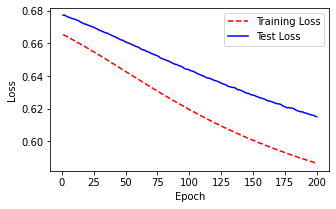

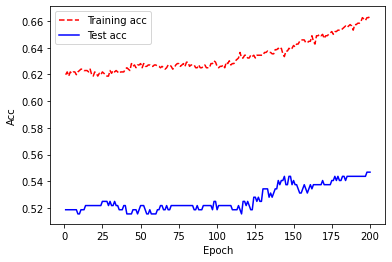

In [ ]:
model = learner.NN_arch2()
#print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
val_loss,val_acc = learner.model_fit(model,200)
history = model.fit(X_train,y_train,epochs=200,verbose=0, validation_data=(X_test, y_test)) # Data for evaluation
learner.history_plot(history)

Model Execution for a one hidden layer<br>
Epoch - 200
<br>
Learning Rate = 0.001<br>
Input Layer ReLU Input<br>
One Hidden Layer ReLU Input<br>
Output Layer Sigmoid Output<br> 


Epoch 1/200
192/192 [==============================] - 0s 275us/step - loss: 3.8965 - accuracy: 0.4740
Epoch 2/200
192/192 [==============================] - 0s 50us/step - loss: 3.8945 - accuracy: 0.4740
Epoch 3/200
192/192 [==============================] - 0s 51us/step - loss: 3.8927 - accuracy: 0.4635
Epoch 4/200
192/192 [==============================] - 0s 45us/step - loss: 3.8908 - accuracy: 0.4583
Epoch 5/200
192/192 [==============================] - 0s 50us/step - loss: 3.8893 - accuracy: 0.4479
Epoch 6/200
192/192 [==============================] - 0s 46us/step - loss: 3.8880 - accuracy: 0.4375
Epoch 7/200
192/192 [==============================] - 0s 63us/step - loss: 3.8864 - accuracy: 0.4219
Epoch 8/200
192/192 [==============================] - 0s 65us/step - loss: 3.8850 - accuracy: 0.4115
Epoch 9/200
192/192 [==============================] - 0s 53us/step - loss: 3.8838 - accuracy: 0.4167
Epoch 10/200
192/192 [==============================] - 0s 54us/step - loss: 3.88

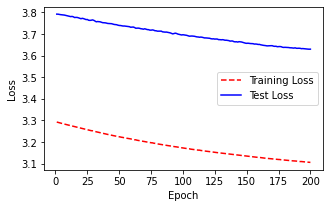

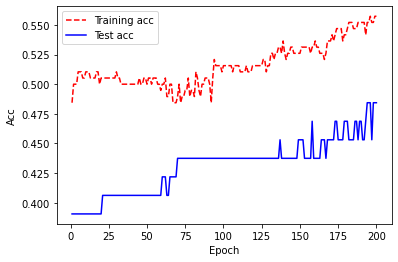

In [ ]:
model = learner.NN_arch3()
#print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
val_loss,val_acc = learner.model_fit(model,200)
history = model.fit(X_train,y_train,epochs=200,verbose=0, validation_data=(X_test, y_test)) # Data for evaluation
learner.history_plot(history)

Model Execution for a one hidden layer<br>
Epoch - 200
<br>
Learning Rate = 0.001<br>
Input Layer: ReLU Input<br>
One Hidden Layer - ReLU Input <br>
One Hidden Layer - ReLU Input <br>
Output Layer Sigmoid Output<br>


Epoch 1/200
192/192 [==============================] - 0s 325us/step - loss: 0.6905 - accuracy: 0.5031
Epoch 2/200
192/192 [==============================] - 0s 59us/step - loss: 0.6897 - accuracy: 0.5073
Epoch 3/200
192/192 [==============================] - 0s 47us/step - loss: 0.6891 - accuracy: 0.5115
Epoch 4/200
192/192 [==============================] - 0s 44us/step - loss: 0.6885 - accuracy: 0.5156
Epoch 5/200
192/192 [==============================] - 0s 51us/step - loss: 0.6879 - accuracy: 0.5281
Epoch 6/200
192/192 [==============================] - 0s 59us/step - loss: 0.6874 - accuracy: 0.5344
Epoch 7/200
192/192 [==============================] - 0s 51us/step - loss: 0.6869 - accuracy: 0.5427
Epoch 8/200
192/192 [==============================] - 0s 49us/step - loss: 0.6864 - accuracy: 0.5542
Epoch 9/200
192/192 [==============================] - 0s 58us/step - loss: 0.6858 - accuracy: 0.5510
Epoch 10/200
192/192 [==============================] - 0s 50us/step - loss: 0.68

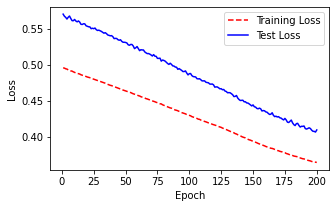

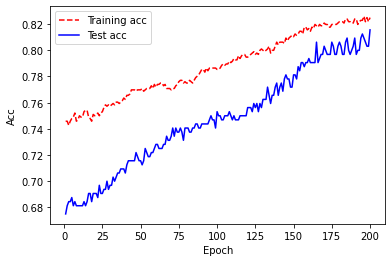

In [ ]:
model = learner.NN_arch4()
val_loss,val_acc = learner.model_fit(model,200)
history = model.fit(X_train,y_train,epochs=200,verbose=0, validation_data=(X_test, y_test)) # Data for evaluation
learner.history_plot(history)

Model Execution for a two hidden layer Neural Net<br>
Epoch - 700
<br>
Learning Rate = 0.001<br>
Input Layer: ReLU Input<br>
One Hidden Layer - ReLU Input <br>
One Hidden Layer - ReLU Input <br>
Output Layer Sigmoid Output<br>


Epoch 1/700
192/192 [==============================] - 0s 319us/step - loss: 0.7116 - accuracy: 0.4938
Epoch 2/700
192/192 [==============================] - 0s 68us/step - loss: 0.7070 - accuracy: 0.4896
Epoch 3/700
192/192 [==============================] - 0s 55us/step - loss: 0.7028 - accuracy: 0.4885
Epoch 4/700
192/192 [==============================] - 0s 57us/step - loss: 0.6998 - accuracy: 0.4885
Epoch 5/700
192/192 [==============================] - 0s 53us/step - loss: 0.6973 - accuracy: 0.4927
Epoch 6/700
192/192 [==============================] - 0s 47us/step - loss: 0.6957 - accuracy: 0.4927
Epoch 7/700
192/192 [==============================] - 0s 48us/step - loss: 0.6942 - accuracy: 0.4927
Epoch 8/700
192/192 [==============================] - 0s 48us/step - loss: 0.6928 - accuracy: 0.4938
Epoch 9/700
192/192 [==============================] - 0s 46us/step - loss: 0.6918 - accuracy: 0.5042
Epoch 10/700
192/192 [==============================] - 0s 48us/step - loss: 0.69

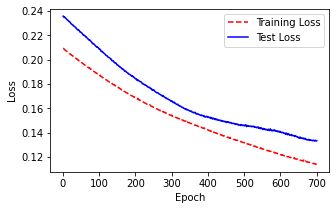

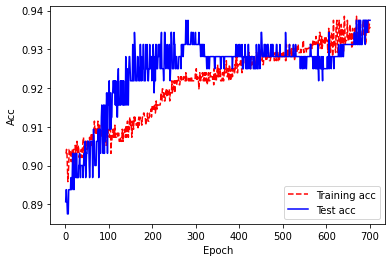

In [ ]:
model = learner.NN_arch4()
#print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())
val_loss,val_acc = learner.model_fit(model,700)
history = model.fit(X_train,y_train,epochs=700,verbose=0, validation_data=(X_test, y_test)) # Data for evaluation
learner.history_plot(history)

A good Accuracy is observed above but a constant flucuation in the in the test accuracy is observed
<br>
Thus tuning the same model with different Learning rates.
<br>

Model Execution for a two hidden layer Neural Net<br>
Epoch - 700
<br>
learning_rates = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5]<br>
learning_rates = [0.008,0.0085,0.0090,0.0095,0.010,0.015]
<br>
-Input Layer: ReLU Input<br>
One Hidden Layer - ReLU Input <br>
One Hidden Layer - ReLU Input <br>
-Output Layer Sigmoid Output<br>


Learning Rate: 0.008


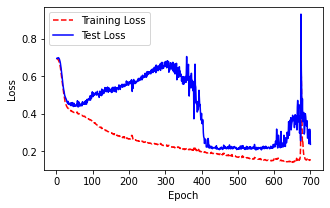

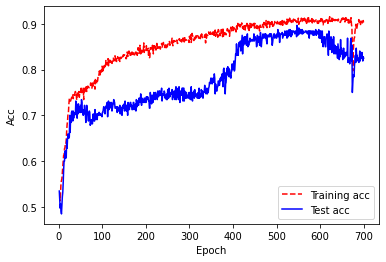

------------**_**---------------
Learning Rate: 0.0085


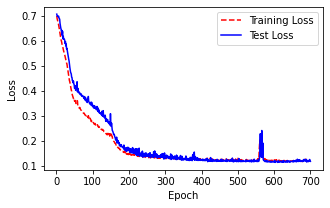

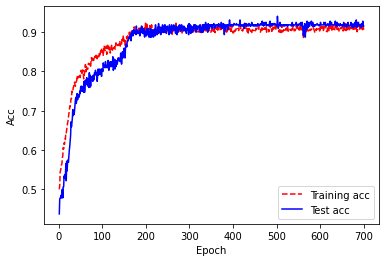

------------**_**---------------
Learning Rate: 0.009


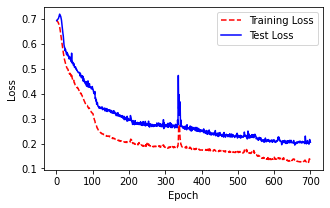

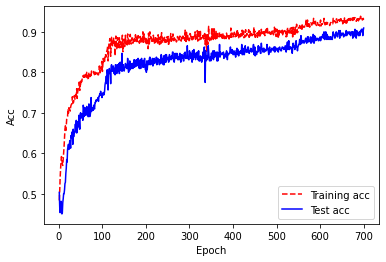

------------**_**---------------
Learning Rate: 0.0095


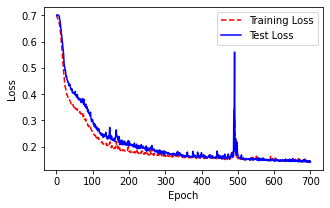

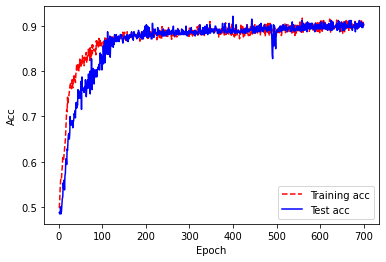

------------**_**---------------
Learning Rate: 0.01


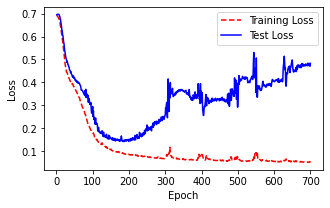

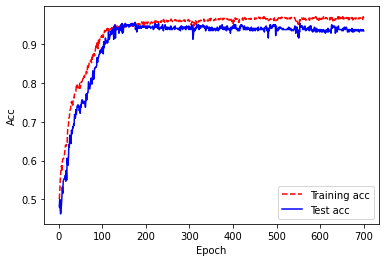

------------**_**---------------
Learning Rate: 0.015


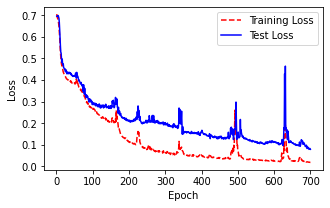

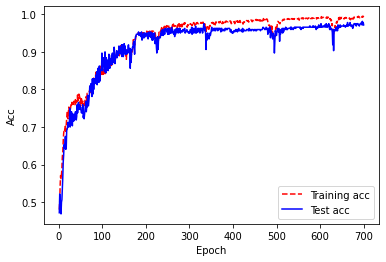

------------**_**---------------


In [ ]:
from tensorflow import keras

#learning_rates = [1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
learning_rates = [0.008,0.0085,0.0090,0.0095,0.010,0.015]
for i in range(len(learning_rates)):
  print("Learning Rate:",learning_rates[i])
  model = learner.NN_arch4(learning_rates[i])
  #val_loss,val_acc = learner.model_fit(model,200)
  history = model.fit(X_train,y_train,epochs=700, verbose=0,validation_data=(X_test, y_test))
  learner.history_plot(history)
  print("------------**_**---------------")

Model Execution for a two hidden layer Neural Net<br>
Epoch - 700<br>
Learning Rate = 0.0091 <br>
-Input Layer: ReLU Input <br>
One Hidden Layer - ReLU Input<br>
One Hidden Layer - ReLU Input<br>
-Output Layer Sigmoid Output<br>

In [ ]:
model = learner.NN_arch4(0.0091)
val_loss,val_acc = learner.model_fit(model,700)

Epoch 1/700
192/192 [==============================] - 0s 428us/step - loss: 0.6996 - accuracy: 0.5052
Epoch 2/700
192/192 [==============================] - 0s 65us/step - loss: 0.6883 - accuracy: 0.5500
Epoch 3/700
192/192 [==============================] - 0s 61us/step - loss: 0.6844 - accuracy: 0.5573
Epoch 4/700
192/192 [==============================] - 0s 58us/step - loss: 0.6787 - accuracy: 0.5708
Epoch 5/700
192/192 [==============================] - 0s 58us/step - loss: 0.6723 - accuracy: 0.5865
Epoch 6/700
192/192 [==============================] - 0s 59us/step - loss: 0.6648 - accuracy: 0.6031
Epoch 7/700
192/192 [==============================] - 0s 62us/step - loss: 0.6555 - accuracy: 0.6042
Epoch 8/700
192/192 [==============================] - 0s 65us/step - loss: 0.6457 - accuracy: 0.6115
Epoch 9/700
192/192 [==============================] - 0s 60us/step - loss: 0.6361 - accuracy: 0.6177
Epoch 10/700
192/192 [==============================] - 0s 58us/step - loss: 0.62

In [ ]:
print(val_loss,val_acc)

0.16112372279167175 0.934374988079071


In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("/content/drive/My Drive/Neural Nets Assignment/binary_adder_model_updated_V1")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("/content/drive/My Drive/Neural Nets Assignment/binary_adder_model_updated_V1")

Making Prediction for the New Binary Number:

Addition of <br>
1 1 0 0 <br>
+<br>
1 0 1 0<br>
________________
1  0  1  1  0 

In [ ]:
list = [1,1,0,0,1,0,1,0]
a = pd.DataFrame(list).T

In [ ]:
pred = reconstructed_model.predict([a.iloc[:,0:8]])

In [ ]:
learner.predicted(pred)


1  0  1  1  0  